<a href="https://colab.research.google.com/github/deepanshuMeteor/QA-Big-Data-Fundamentals/blob/main/4_1_DG_CS_GraphModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Graph Theory & Network Science

## 4 Network Science & Graph Modelling
### 4.1 Graph Models of Relational Data

In [ ]:
import networkx as nx


import pandas as pd
import matplotlib.pyplot as plt

## The US Airport Dataset

This dataset contains data for 25 years (1995-2015) of flights between various US airports and metadata about these routes. Taken from Bureau of Transportation Statistics, United States Department of Transportation.

In [ ]:
passengers = pd.read_csv('datasets/extra/passengers.csv')

In [ ]:
passengers.head()

,Unnamed: 0,YEAR,ORIGIN,DEST,UNIQUE_CARRIER_NAME,PASSENGERS
0,0,1990,ABE,ACY,{'US Airways Inc.'},73.0
1,1,1990,ABE,ATL,{'Eastern Air Lines Inc.'},73172.0
2,2,1990,ABE,AVL,{'Westair Airlines Inc.'},0.0
3,3,1990,ABE,AVP,"{'Westair Airlines Inc.', 'US Airways Inc.', '...",8397.0
4,4,1990,ABE,BHM,{'Eastern Air Lines Inc.'},59.0


Notice the `ORIGIN` and `DEST` columns describe edges.

We could create a list of edges...

In [ ]:
edges = passengers[['ORIGIN', 'DEST']].values

In [ ]:
edges[:10]

array([['ABE', 'ACY'],
       ['ABE', 'ATL'],
       ['ABE', 'AVL'],
       ['ABE', 'AVP'],
       ['ABE', 'BHM'],
       ['ABE', 'BNA'],
       ['ABE', 'BWI'],
       ['ABE', 'CAE'],
       ['ABE', 'CVG'],
       ['ABE', 'DAY']], dtype=object)

And then..

In [ ]:
G = nx.MultiDiGraph()
G.add_edges_from(edges);

In [ ]:
len(G)

2177

Or we can use a special method for working with pandas dataframes that NetworkX provides...

In [ ]:
PG = nx.from_pandas_edgelist(
    passengers, 
    source='ORIGIN', 
    target='DEST', 
    edge_attr=['YEAR', 'PASSENGERS', 'UNIQUE_CARRIER_NAME'], 
    create_using=nx.MultiDiGraph()
)

In [ ]:
len(PG)

2177

## Graphs Group by Edges

In [ ]:
cleveland = 'CLE'
chicago = 'ORD'
yr0 = 1990

c2c = PG[cleveland][chicago]

In [ ]:
PG['CLE']['ORD'][0]

{'YEAR': 1990,
 'PASSENGERS': 386602.0,
 'UNIQUE_CARRIER_NAME': "{'Continental Air Lines Inc.', 'United Air Lines Inc.', 'American Airlines Inc.'}"}

In [ ]:
c2c[0]

{'YEAR': 1990,
 'PASSENGERS': 386602.0,
 'UNIQUE_CARRIER_NAME': "{'Continental Air Lines Inc.', 'United Air Lines Inc.', 'American Airlines Inc.'}"}

In [ ]:
c2c[2000 - yr0]

{'YEAR': 2000,
 'PASSENGERS': 391718.0,
 'UNIQUE_CARRIER_NAME': "{'United Air Lines Inc.', 'ExpressJet Airlines Inc. (1)', 'American Airlines Inc.', 'Envoy Air', 'Continental Air Lines Inc.', 'Northwest Airlines Inc.'}"}

In [ ]:
PG['CLE']['ORD'][10]['PASSENGERS']

391718.0

In [ ]:
c2c_yp = { weight['YEAR'] :  weight['PASSENGERS'] for weight in c2c.values() }

In [ ]:
c2c_yp

{1990: 386602.0,
 1991: 404416.0,
 1992: 437666.0,
 1993: 436678.0,
 1994: 475496.0,
 1995: 488581.0,
 1996: 465392.0,
 1997: 446734.0,
 1998: 438346.0,
 1999: 431422.0,
 2000: 391718.0,
 2001: 342602.0,
 2002: 348070.0,
 2003: 350769.0,
 2004: 390006.0,
 2005: 397852.0,
 2006: 388539.0,
 2007: 378752.0,
 2008: 340616.0,
 2009: 339208.0,
 2010: 313656.0,
 2011: 303419.0,
 2012: 351191.0,
 2013: 371756.0,
 2014: 392492.0,
 2015: 409943.0}

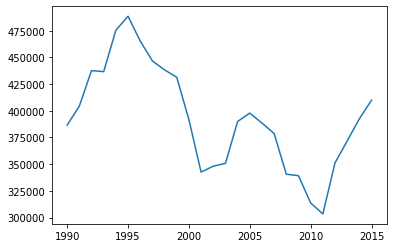

In [ ]:
plt.plot(list(c2c_yp.keys()), list(c2c_yp.values()));

## Exercise

Find the busiest route in 1990 and in 2015 according to number of passengers.

In [ ]:
p90_max = passengers.loc[ passengers['YEAR'] == 1990, 'PASSENGERS'].max()
p15_max = passengers.loc[ passengers['YEAR'] == 2015, 'PASSENGERS'].max()

In [ ]:
p90_max

1827164.0

## Multi Graphs to Graphs

In [ ]:
len([ (u,v,w) for (u,v,w) in PG.edges(data=True) if w['YEAR'] == 2000 ])

11016

In [ ]:
PG2k = nx.DiGraph()
PG2k.add_edges_from((u,v,w) for (u,v,w) in PG.edges(data=True) if w['YEAR'] == 2000 )

In [ ]:
len(PG2k.nodes())

559

In [ ]:
len(PG2k.edges())

11016

## Visualizing Geographical Networks

In [ ]:
airports = pd.read_csv('datasets/extra/GlobalAirportDatabase.txt', delimiter=':', header=None)

In [ ]:
airports[:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392


In [ ]:
airport_locations = airports[[1, 14, 15]].rename(columns={1: 'CODE', 14: 'LAT', 15: 'LONG'})

In [ ]:
airport_locations.head()

,CODE,LAT,LONG
0,GKA,-6.082,145.392
1,LAE,0.000,0.000
2,MAG,-5.207,145.789
3,HGU,-5.826,144.296
4,LAE,-6.570,146.726


This dataset does not contain locations for all the airports in the graph, so we have to just select those nodes for which we do have locations (only c. 200!). 


In [ ]:
selected_nodes = airport_locations['CODE'].isin(PG2k.nodes())
known_locations = airport_locations[ selected_nodes ]

known_locations.head()

,CODE,LAT,LONG
3380,ABI,32.411,-99.682
3381,ABQ,0.000,0.000
3382,ACK,41.253,-70.060
3383,ACT,31.611,-97.230
3384,ACY,39.458,-74.577


In [ ]:
PG2k_known = nx.subgraph(PG2k, known_locations['CODE'])

In [ ]:
len(PG)

2177

In [ ]:
len(PG2k)

559

In [ ]:
len(PG2k_known)

281

In [ ]:
PG2k_known.nodes()

NodeView(('ATL', 'BWI', 'CVG', 'DTW', 'EWR', 'GRR', 'IAD', 'JFK', 'LGA', 'MDT', 'ORD', 'PHL', 'PIT', 'CLE', 'CLT', 'IND', 'MCO', 'MSP', 'ISP', 'BLV', 'CHS', 'DSM', 'ACY', 'CMH', 'FLL', 'TPA', 'PBI', 'RSW', 'MYR', 'DCA', 'ABI', 'ABQ', 'AGS', 'ALB', 'AMA', 'AUS', 'BDL', 'BGR', 'BHM', 'BNA', 'BOS', 'BTR', 'BUF', 'CAE', 'CHA', 'COS', 'COU', 'DAY', 'DEN', 'DFW', 'ELP', 'GNV', 'HNL', 'HOU', 'IAH', 'ICT', 'JAN', 'JAX', 'LAS', 'LAX', 'LFT', 'LIT', 'MCI', 'MDW', 'MEM', 'MIA', 'MKE', 'MLB', 'MLU', 'MOB', 'MSN', 'MSY', 'OKC', 'OMA', 'ONT', 'ORF', 'PDX', 'PHX', 'PNS', 'PVD', 'RDU', 'RIC', 'ROC', 'SAN', 'SAT', 'SAV', 'SEA', 'SFO', 'SHV', 'SJU', 'SLC', 'STL', 'STT', 'STX', 'SYR', 'TLH', 'TUL', 'TYS', 'ANC', 'ILM', 'PWM', 'SWF', 'TUS', 'LAN', 'SNA', 'ABY', 'BQK', 'DAL', 'DHN', 'FLO', 'MCN', 'OAK', 'VPS', 'CRP', 'GEG', 'PIE', 'CYS', 'LRD', 'PHF', 'YIP', 'AEX', 'SJC', 'SMF', 'DET', 'GGG', 'FSM', 'HPN', 'PAE', 'SFB', 'TXK', 'EFD', 'ACT', 'BPT', 'ILG', 'LCK', 'VCV', 'BOI', 'GRB', 'BFM', 'LCH', 'BRO', 'BI

In [ ]:
airport_positions = { row['CODE']: (row['LONG'], row['LAT']) for index, row  in known_locations.iterrows() }

In [ ]:
airport_positions['ORD']

(-87.904, 41.979)

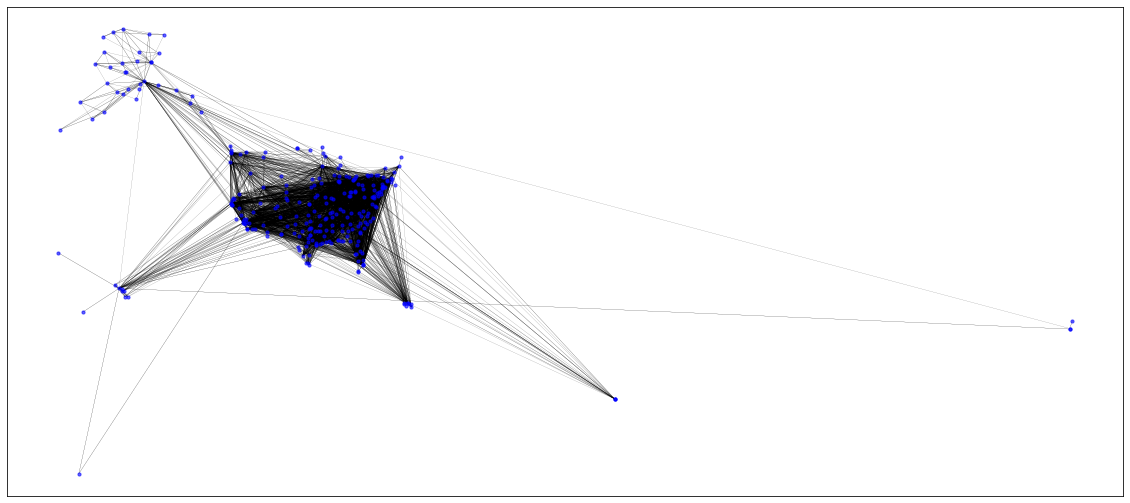

In [ ]:
plt.figure(figsize=(20, 9))
nx.draw_networkx_nodes(PG2k_known, pos=airport_positions, node_size=10, alpha=0.6, node_color='b');
nx.draw_networkx_edges(PG2k_known, pos=airport_positions, width=0.1, arrows=False);

## Centrality

### PageRank

You are more important if your friends are important. Roughly: centrality of B is increased by in-degree of A, given (A, B). 

<img src="assets/ana-pagerank.jpg" align="left" />

### Centrality Distributions

In [ ]:
pr = list(nx.pagerank(PG2k).values())
pr_nodeid = range(len(pr))

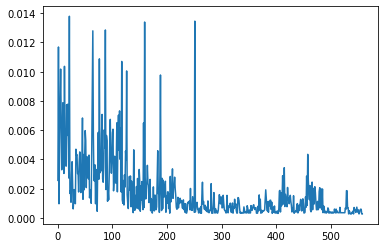

In [ ]:
plt.plot(pr_nodeid, pr)

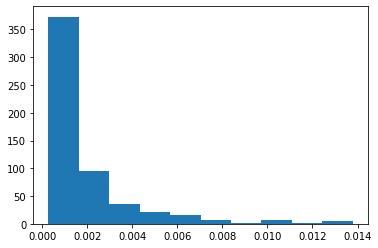

In [ ]:
plt.hist(pr);

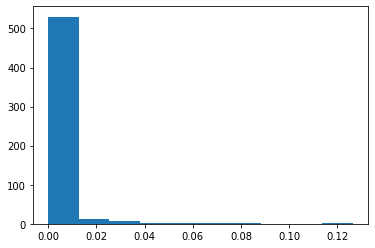

In [ ]:
plt.hist(nx.betweenness_centrality(PG2k).values());

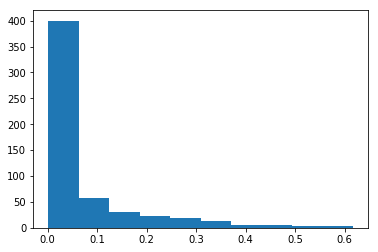

In [ ]:
plt.hist(nx.degree_centrality(PG2k).values());

In [ ]:
sorted( 
    ((rank, code) for code, rank in nx.pagerank(PG2k).items()), reverse=True
)[:10]

[(0.013790360527445212, 'MSP'),
 (0.013455744418797572, 'FAI'),
 (0.013394851142496675, 'YIP'),
 (0.012851978598030315, 'MEM'),
 (0.012792408392498938, 'DFW'),
 (0.011688084325292588, 'ATL'),
 (0.010877424195624007, 'IAH'),
 (0.010702817852641095, 'STL'),
 (0.010367703120133468, 'ORD'),
 (0.010178344166399535, 'DTW')]

In [ ]:
sorted( 
    ((rank, code) for code, rank in nx.betweenness_centrality(PG2k).items()), reverse=True
)[:10]

[(0.12632847963237603, 'MSP'),
 (0.12553274658751884, 'ANC'),
 (0.11581237304244392, 'FAI'),
 (0.086497749849352, 'YIP'),
 (0.0670168156285972, 'SEA'),
 (0.06089582080903498, 'ATL'),
 (0.05444323675749989, 'MEM'),
 (0.05354790742025908, 'JFK'),
 (0.04441263120719328, 'DEN'),
 (0.043485462424117806, 'DFW')]

In [ ]:
sorted( 
    ((rank, code) for code, rank in nx.degree_centrality(PG2k).items()), reverse=True
)[:10]

[(0.6164874551971327, 'MSP'),
 (0.5913978494623656, 'ATL'),
 (0.5591397849462365, 'DFW'),
 (0.5519713261648745, 'ORD'),
 (0.5017921146953405, 'DTW'),
 (0.496415770609319, 'MEM'),
 (0.489247311827957, 'STL'),
 (0.471326164874552, 'YIP'),
 (0.44802867383512546, 'IAH'),
 (0.4390681003584229, 'CVG')]

## Paths

In [ ]:
nx.average_shortest_path_length(PG2k)

NetworkXError: Graph is not weakly connected.

In [ ]:
len(PG2k)

559

In [ ]:
components = list(nx.weakly_connected_components(PG2k))

In [ ]:
len(components)

2

In [ ]:
len(components[0])

557

In [ ]:
len(components[0]) / len(PG2k)

0.9964221824686941

In [ ]:
len(components[1])

2

In [ ]:
components[1]

{'FTW', 'NEW'}

In [ ]:
PG2k.remove_nodes_from(components[1])

In [ ]:
nx.is_weakly_connected(PG2k)

True

In [ ]:
nx.average_shortest_path_length(PG2k)

2.624475285121992

# Exercise

* Compute centrality measures before and after the addition or removal of nodes/edges
    * G.add_edge, G.remove_node
    * G.add_edges_from(listofedges), G.remove_nodes_from(listofnodes)
    
* eg., PG2k.add_egde( ('DFW', 'CVG') ) 
    * then recompute average_path_length, betwneenness

* and thus by doing so, assess the importance/impact of hubs and route bottlenecks. 


### Example: Removing a Top Hub Airport

In [ ]:
top5 = sorted([ (rank, name) for name, rank in nx.betweenness_centrality(PG2k).items() ], reverse=True)[:5]

In [ ]:
top5

[(0.12723977393421568, 'MSP'),
 (0.1264383007190368, 'ANC'),
 (0.11664780742701998, 'FAI'),
 (0.08712171767346458, 'YIP'),
 (0.0675002540613837, 'SEA')]

In [ ]:
PG2k.remove_nodes_from(['MSP', 'ANC'])

In [ ]:
splits = list(nx.weakly_connected_components(PG2k))

In [ ]:
len(splits)

6

In [ ]:
[ len(s) for s in splits]

[549, 1, 2, 1, 1, 1]

In [ ]:
PG2k.remove_nodes_from( splits[1] | splits[2] | splits[3] | splits[4] | splits[5] )

In [ ]:
nx.average_shortest_path_length(PG2k)

2.8290488346429474

In [ ]:
'MSP' in PG2k

True

In [ ]:
0.2 / 2.6

0.07692307692307693